In [1]:
!nvidia-smi

Wed Apr 14 15:02:32 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.33.01    Driver Version: 440.33.01    CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:84:00.0 Off |                    0 |
| N/A   22C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
!pip install -q -U watermark

In [4]:
# %reload_ext watermark
# %watermark -v -p numpy,pandas

# Import liabraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
from pathlib import Path
from tensorflow.keras import applications
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras import metrics
from tensorflow.keras import Model
from tensorflow.keras.applications import resnet

tf.__version__

'2.3.1'

# Dowload and Explore the Dataset

In [6]:
# Dowload the dataset
!wget http://vision.cs.utexas.edu/projects/finegrained/utzap50k/ut-zap50k-images.zip

--2021-04-14 01:35:32--  http://vision.cs.utexas.edu/projects/finegrained/utzap50k/ut-zap50k-images.zip
Resolving vision.cs.utexas.edu (vision.cs.utexas.edu)... 128.83.120.116
Connecting to vision.cs.utexas.edu (vision.cs.utexas.edu)|128.83.120.116|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 305323328 (291M) [application/zip]
Saving to: ‘ut-zap50k-images.zip’

100%[======================================>] 305,323,328 42.7MB/s   in 18s    

2021-04-14 01:35:51 (15.7 MB/s) - ‘ut-zap50k-images.zip’ saved [305323328/305323328]



In [7]:
!unzip ut-zap50k-images.zip

Archive:  ut-zap50k-images.zip
   creating: ut-zap50k-images/Boots/
   creating: ut-zap50k-images/Boots/Ankle/
   creating: ut-zap50k-images/Boots/Ankle/A. Testoni/
  inflating: ut-zap50k-images/Boots/Ankle/A. Testoni/7965307.5291.jpg  
  inflating: ut-zap50k-images/Boots/Ankle/A. Testoni/7999255.363731.jpg  
  inflating: ut-zap50k-images/Boots/Ankle/A. Testoni/8000978.364150.jpg  
   creating: ut-zap50k-images/Boots/Ankle/adidas Kids/
  inflating: ut-zap50k-images/Boots/Ankle/adidas Kids/8070145.388249.jpg  
  inflating: ut-zap50k-images/Boots/Ankle/adidas Kids/8070146.388250.jpg  
   creating: ut-zap50k-images/Boots/Ankle/adidas Originals Kids/
  inflating: ut-zap50k-images/Boots/Ankle/adidas Originals Kids/8025627.371498.jpg  
  inflating: ut-zap50k-images/Boots/Ankle/adidas Originals Kids/8025627.74095.jpg  
  inflating: ut-zap50k-images/Boots/Ankle/adidas Originals Kids/8025719.11196.jpg  
  inflating: ut-zap50k-images/Boots/Ankle/adidas Originals Kids/8025719.371523.jpg  
   crea

In [8]:
import os
import shutil

#from google.colab import drive
#drive.mount('content/')

os.getcwd()
# root = '/content/ut-zap50k-images'
root = 'ut-zap50k-images'
subfolder_name = []
def makedir(dirname):
  foldernames = os.listdir(dirname)
  for subfolder in foldernames:
    subfolder_name.append(subfolder)
    if not os.path.exists(subfolder):
      os.makedirs(subfolder)

def searchdir(dirname):
  filenames = os.listdir(dirname)

  for filename in filenames:
    full_filename = os.path.join(dirname, filename)
    base_folder_name = full_filename.split('/')[1]
    # print(full_filename.split('/')[1])

    if os.path.isdir(full_filename):
      searchdir(full_filename)
    else:
      shutil.move(full_filename, base_folder_name + '/' + os.path.basename(full_filename))

makedir(root)
searchdir(root)

In [9]:
!mkdir data
!mv Boots Sandals Shoes Slippers data

# A folder to hold a subset for testing models
!mkdir data2
!mkdir data2/Boots data2/Sandals data2/Shoes data2/Slippers

In [10]:
# https://unix.stackexchange.com/questions/217712/randomly-copy-certain-amount-of-certain-file-type-from-one-directory-into-anothe
# copy a subset of the dataset

!find data/Boots -type f -name "*.jpg" -print0 | xargs -0 shuf -e -n 8 -z | xargs -0 cp -vt data2/Boots
!find data/Sandals -type f -name "*.jpg" -print0 | xargs -0 shuf -e -n 8 -z | xargs -0 cp -t data2/Sandals
!find data/Shoes -type f -name "*.jpg" -print0 | xargs -0 shuf -e -n 8 -z | xargs -0 cp -t data2/Shoes
!find data/Slippers -type f -name "*.jpg" -print0 | xargs -0 shuf -e -n 8 -z | xargs -0 cp -t data2/Slippers

‘data/Boots/8063827.72.jpg’ -> ‘data2/Boots/8063827.72.jpg’
‘data/Boots/8023545.327564.jpg’ -> ‘data2/Boots/8023545.327564.jpg’
‘data/Boots/7993438.325.jpg’ -> ‘data2/Boots/7993438.325.jpg’
‘data/Boots/7982976.358108.jpg’ -> ‘data2/Boots/7982976.358108.jpg’
‘data/Boots/7994265.401.jpg’ -> ‘data2/Boots/7994265.401.jpg’
‘data/Boots/8004017.72.jpg’ -> ‘data2/Boots/8004017.72.jpg’
‘data/Boots/8037238.106.jpg’ -> ‘data2/Boots/8037238.106.jpg’
‘data/Boots/8050349.183092.jpg’ -> ‘data2/Boots/8050349.183092.jpg’
‘data/Boots/8027026.106.jpg’ -> ‘data2/Boots/8027026.106.jpg’
‘data/Boots/7386618.654.jpg’ -> ‘data2/Boots/7386618.654.jpg’
‘data/Boots/7196717.48958.jpg’ -> ‘data2/Boots/7196717.48958.jpg’
‘data/Boots/7795512.14804.jpg’ -> ‘data2/Boots/7795512.14804.jpg’
‘data/Boots/7987417.48422.jpg’ -> ‘data2/Boots/7987417.48422.jpg’
‘data/Boots/7594577.377081.jpg’ -> ‘data2/Boots/7594577.377081.jpg’
‘data/Boots/8101601.8775.jpg’ -> ‘data2/Boots/8101601.8775.jpg’
‘data/Boots/7335118.32800.jpg’ -> ‘d

In [11]:
import pathlib
data_dir = pathlib.Path("data")
boots_count = len(list(data_dir.glob('Boots/*.jpg')))
sandals_count = len(list(data_dir.glob('Sandals/*.jpg')))
shoes_count = len(list(data_dir.glob('Shoes/*.jpg')))
slippers_count = len(list(data_dir.glob('Slippers/*.jpg')))
print(boots_count, sandals_count, shoes_count, slippers_count)
print(f"Total = {boots_count + sandals_count + shoes_count + slippers_count}")

12832 5741 30169 1283
Total = 50025


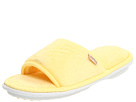

In [15]:
import PIL
import PIL.Image

boots = list(data_dir.glob('Boots/*.jpg'))
sandals = list(data_dir.glob('Sandals/*.jpg'))
shoes = list(data_dir.glob('Shoes/*.jpg'))
slippers = list(data_dir.glob('Slippers/*.jpg'))

PIL.Image.open(str(slippers[0]))

In [16]:
sandals[0], slippers[1], 

(PosixPath('data/Sandals/7930422.346.jpg'),
 PosixPath('data/Slippers/7138704.7516.jpg'))

In [ ]:
# double check the dimention of each image
import cv2
boots_shapes = []
sandals_shapes = []
shoes_shapes = []
slippers_shapes = []
for i in range(boots_count):
  im1 = cv2.imread(str(boots[i]))
  boots_shapes.append(im1.shape)

for i in range(sandals_count):
  im2 = cv2.imread(str(sandals[i]))
  sandals_shapes.append(im2.shape)

for i in range(shoes_count):
  im3 = cv2.imread(str(shoes[i]))
  shoes_shapes.append(im3.shape)

for i in range(slippers_count):
  im4 = cv2.imread(str(slippers[i]))
  slippers_shapes.append(im4.shape)

  # print(type(im))  # <class 'numpy.ndarray'>


In [ ]:
np.mean(boots_shapes, axis=0), np.mean(sandals_shapes, axis=0), np.mean(shoes_shapes, axis=0), np.mean(slippers_shapes, axis=0)

In [ ]:
for i in range(sandals_count):
  if sandals_shapes[i][1]< 136:
    print(sandals_shapes[i])


In [ ]:
sandals_shapes[1][1]

# Image Preprocessing 

In [18]:
pip install split-folders

Note: you may need to restart the kernel to use updated packages.


In [19]:
import splitfolders 
splitfolders.ratio('data', output="splitted_data", seed=1337, ratio=(.8, 0.1,0.1))

## Create The dataset for TF

In [2]:
image_size = (102, 136) 
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "splitted_data/train",
    labels = 'inferred',
    label_mode='categorical',
    # validation_split=0.2,
    # subset="training",
    seed=1234,
    image_size=image_size,
    batch_size=batch_size,
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "splitted_data/val",
    labels = 'inferred',
    label_mode='categorical',
    # validation_split=None,
    # subset="validation",
    seed=1234,
    image_size=image_size,
    batch_size=batch_size,
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "splitted_data/test",
    labels = 'inferred',
    label_mode='categorical',
    # validation_split=None,
    # subset="validation",
    seed=1234,
    image_size=image_size,
    batch_size=batch_size,
)

Found 40018 files belonging to 4 classes.
Found 5001 files belonging to 4 classes.
Found 5006 files belonging to 4 classes.


In [20]:
import os

list1 = os.listdir('splitted_data/val/Boots') # dir is your directory path
list2 = os.listdir('splitted_data/val/Sandals') # dir is your directory path
list3 = os.listdir('splitted_data/val/Shoes') # dir is your directory path
list4 = os.listdir('splitted_data/val/Slippers') # dir is your directory path

number_files = len(list1) + len(list2) + len(list3)+ len(list4)
print(number_files)

5001


In [3]:
# View a single example entry from a batch
features, label = iter(train_ds).next()
print("example features:", features[0])
print("example label:", label[0])

example features: tf.Tensor(
[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]], shape=(102, 136, 3), dtype=float32)
example label: tf.Tensor([0. 0. 1. 0.], shape=(4,), dtype=float32)


In [4]:
# The class names that is inferred from the folders names
class_names = train_ds.class_names
print(class_names)

['Boots', 'Sandals', 'Shoes', 'Slippers']


In [9]:
print("example label:", label[0].numpy().tolist().index(1))

example label: 2


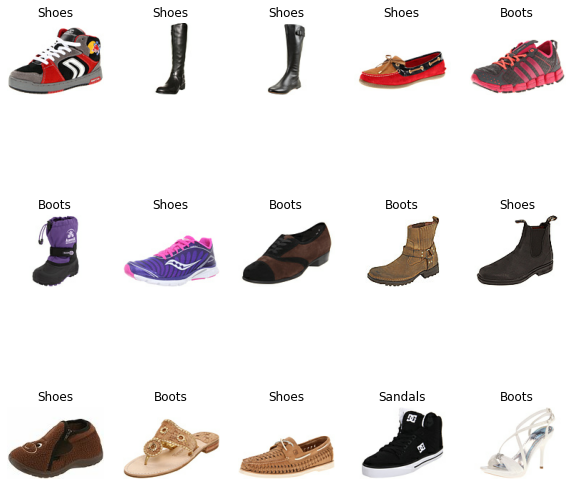

In [10]:
#Visualize a random subset of the training data

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(15):
    ax = plt.subplot(3, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[label[i].numpy().tolist().index(1)])    
    plt.axis("off")

In [42]:
# Check the batch shape
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 102, 136, 3)
(32, 4)


In [5]:
# Configure and normalize the dataset for performance

# train_ds = train_ds.prefetch(buffer_size=32)
# val_ds = val_ds.prefetch(buffer_size=32)

# AUTOTUNE = tf.data.AUTOTUNE
norm_layer = layers.experimental.preprocessing.Rescaling(1./255)

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=100)
train_ds = train_ds.map(lambda x, y: (norm_layer(x), y))   #  pixels values be in '[0,1]'

val_ds = val_ds.cache().prefetch(buffer_size=100)
val_ds = val_ds.map(lambda x, y: (norm_layer(x), y))       #  pixels values be in '[0,1]'

test_ds = test_ds.cache().prefetch(buffer_size=100)
test_ds = test_ds.map(lambda x, y: (norm_layer(x), y))       #  pixels values be in '[0,1

# Xception model

In [6]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.layers import Input
import time


## 1- Train only the top (added Dense) layers

In [8]:
# this could also be the output a different Keras model or layer
input_tensor = Input(shape=(102, 136, 3))

base_model4 = Xception(input_tensor=input_tensor, weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model4.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(512, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(4, activation='softmax')(x)

# this is the model we will train
model4 = Model(inputs=base_model4.input, outputs=predictions)

for layer in base_model4.layers:
    layer.trainable = False

model4.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 102, 136, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 50, 67, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 50, 67, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 50, 67, 32)   0           block1_conv1_bn[0][0]            
_______________________________________________________________________________________

In [18]:
epochs = 10

# callbacks = [
#     tf.keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5"),
# ]

from tensorflow.keras.optimizers import SGD
model4.compile(optimizer=SGD(lr=0.001, momentum=0.9), loss='categorical_crossentropy', metrics=["accuracy"],)

start_time = time.time()

history = model4.fit(
    train_ds, epochs=epochs, validation_data=val_ds,
)

print(f"\nTrained for {(time.time() - start_time) / 60} minutes ")

Epoch 1/10
1251/1251 [==============================] - 41s 32ms/step - loss: 0.3481 - accuracy: 0.8711 - val_loss: 0.2907 - val_accuracy: 0.8902
Epoch 2/10
1251/1251 [==============================] - 39s 31ms/step - loss: 0.2662 - accuracy: 0.9004 - val_loss: 0.2616 - val_accuracy: 0.9040
Epoch 3/10
1251/1251 [==============================] - 39s 31ms/step - loss: 0.2404 - accuracy: 0.9101 - val_loss: 0.2547 - val_accuracy: 0.9032
Epoch 4/10
1251/1251 [==============================] - 39s 31ms/step - loss: 0.2211 - accuracy: 0.9176 - val_loss: 0.2352 - val_accuracy: 0.9130
Epoch 5/10
1251/1251 [==============================] - 39s 31ms/step - loss: 0.2070 - accuracy: 0.9237 - val_loss: 0.2243 - val_accuracy: 0.9160
Epoch 6/10
1251/1251 [==============================] - 39s 32ms/step - loss: 0.1945 - accuracy: 0.9278 - val_loss: 0.2204 - val_accuracy: 0.9198
Epoch 7/10
1251/1251 [==============================] - 39s 31ms/step - loss: 0.1839 - accuracy: 0.9311 - val_loss: 0.2201 -

In [11]:
y_test = np.concatenate([y for x, y in test_ds], axis=0)
y_test

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [19]:
from sklearn.metrics import classification_report

# encode the test data
y_pred = model4.predict(test_ds)

# calculate classification accuracy
report = classification_report(y_test, np.round(y_pred), digits=4)
print(report)

print('---------------------------------------')

from sklearn.metrics import roc_auc_score
AUC = roc_auc_score(y_test, np.round(y_pred))
print('AUC: ', AUC)

              precision    recall  f1-score   support

           0     0.9347    0.9478    0.9412      1284
           1     0.8289    0.7583    0.7920       575
           2     0.9294    0.9384    0.9339      3018
           3     0.6742    0.4651    0.5505       129

   micro avg     0.9156    0.9079    0.9117      5006
   macro avg     0.8418    0.7774    0.8044      5006
weighted avg     0.9127    0.9079    0.9096      5006
 samples avg     0.9079    0.9079    0.9079      5006

---------------------------------------
AUC:  0.8690403057946161


/share/apps/rc/software/Anaconda3/2020.07/envs/deepNLP2020/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


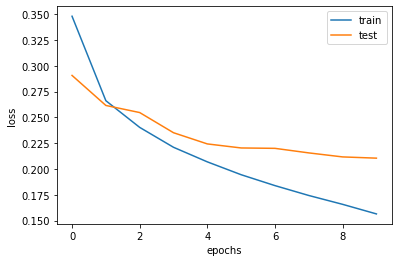

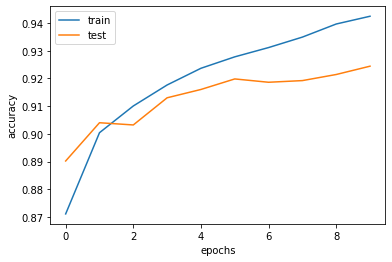

In [20]:
from matplotlib import pyplot

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.ylabel('loss')
pyplot.xlabel('epochs')
pyplot.show()


pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.ylabel('accuracy')
pyplot.xlabel('epochs')
pyplot.show()

## same but longer

In [9]:
epochs = 20

# callbacks = [
#     tf.keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5"),
# ]

from tensorflow.keras.optimizers import SGD
model4.compile(optimizer=SGD(lr=0.001, momentum=0.9), loss='categorical_crossentropy', metrics=["accuracy"],)

start_time = time.time()

history = model4.fit(
    train_ds, epochs=epochs, validation_data=val_ds,
)

print(f"\nTrained for {(time.time() - start_time) / 60} minutes ")

Epoch 1/20
1251/1251 [==============================] - 216s 173ms/step - loss: 0.3492 - accuracy: 0.8720 - val_loss: 0.2800 - val_accuracy: 0.8964
Epoch 2/20
1251/1251 [==============================] - 38s 30ms/step - loss: 0.2635 - accuracy: 0.9027 - val_loss: 0.2676 - val_accuracy: 0.9004
Epoch 3/20
1251/1251 [==============================] - 38s 30ms/step - loss: 0.2393 - accuracy: 0.9105 - val_loss: 0.2478 - val_accuracy: 0.9082
Epoch 4/20
1251/1251 [==============================] - 38s 30ms/step - loss: 0.2201 - accuracy: 0.9175 - val_loss: 0.2333 - val_accuracy: 0.9138
Epoch 5/20
1251/1251 [==============================] - 38s 30ms/step - loss: 0.2060 - accuracy: 0.9233 - val_loss: 0.2272 - val_accuracy: 0.9182
Epoch 6/20
1251/1251 [==============================] - 38s 31ms/step - loss: 0.1942 - accuracy: 0.9269 - val_loss: 0.2262 - val_accuracy: 0.9160
Epoch 7/20
1251/1251 [==============================] - 38s 30ms/step - loss: 0.1832 - accuracy: 0.9313 - val_loss: 0.2211

In [12]:
from sklearn.metrics import classification_report

# encode the test data
y_pred = model4.predict(test_ds)

# calculate classification accuracy
report = classification_report(y_test, np.round(y_pred), digits=4)
print(report)

print('---------------------------------------')
print()

from sklearn.metrics import roc_auc_score
AUC = roc_auc_score(y_test, np.round(y_pred))
print('AUC: ', AUC)
print()

              precision    recall  f1-score   support

           0     0.9463    0.9478    0.9471      1284
           1     0.8457    0.7913    0.8176       575
           2     0.9330    0.9457    0.9393      3018
           3     0.6061    0.4651    0.5263       129

   micro avg     0.9205    0.9161    0.9183      5006
   macro avg     0.8328    0.7875    0.8076      5006
weighted avg     0.9180    0.9161    0.9167      5006
 samples avg     0.9161    0.9161    0.9161      5006

---------------------------------------

AUC:  0.8751892254443248



/share/apps/rc/software/Anaconda3/2020.07/envs/deepNLP2020/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


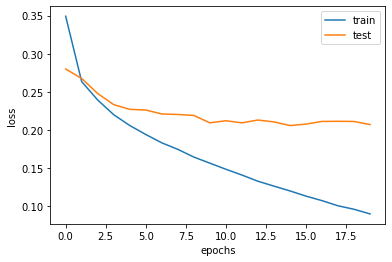

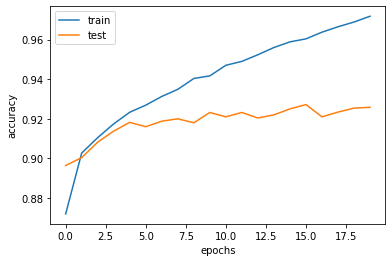

In [13]:
from matplotlib import pyplot

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.ylabel('loss')
pyplot.xlabel('epochs')
pyplot.show()


pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.ylabel('accuracy')
pyplot.xlabel('epochs')
pyplot.show()

## 2- Train all layers

In [14]:
# this could also be the output a different Keras model or layer
input_tensor = Input(shape=(102, 136, 3))

base_model5 = Xception(input_tensor=input_tensor, weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model5.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(512, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(4, activation='softmax')(x)

# this is the model we will train
model5 = Model(inputs=base_model5.input, outputs=predictions)

for layer in base_model5.layers:
    layer.trainable = True

model5.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 102, 136, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 50, 67, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 50, 67, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 50, 67, 32)   0           block1_conv1_bn[0][0]            
_______________________________________________________________________________________

In [15]:
epochs = 50

# callbacks = [
#     tf.keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5"),
# ]

from tensorflow.keras.optimizers import SGD
model5.compile(optimizer=SGD(lr=0.001, momentum=0.9), loss='categorical_crossentropy', metrics=["accuracy"],)

start_time = time.time()

history = model5.fit(
    train_ds, epochs=epochs, validation_data=val_ds,
)

print(f"\nTrained for {(time.time() - start_time) / 60} minutes ")

Epoch 1/50
1251/1251 [==============================] - 152s 122ms/step - loss: 0.3661 - accuracy: 0.8651 - val_loss: 0.1993 - val_accuracy: 0.9282
Epoch 2/50
1251/1251 [==============================] - 151s 120ms/step - loss: 0.1437 - accuracy: 0.9471 - val_loss: 0.1588 - val_accuracy: 0.9482
Epoch 3/50
1251/1251 [==============================] - 151s 121ms/step - loss: 0.0638 - accuracy: 0.9787 - val_loss: 0.1626 - val_accuracy: 0.9490
Epoch 4/50
1251/1251 [==============================] - 151s 120ms/step - loss: 0.0238 - accuracy: 0.9943 - val_loss: 0.1826 - val_accuracy: 0.9506
Epoch 5/50
1251/1251 [==============================] - 150s 120ms/step - loss: 0.0097 - accuracy: 0.9980 - val_loss: 0.1972 - val_accuracy: 0.9506
Epoch 6/50
1251/1251 [==============================] - 150s 120ms/step - loss: 0.0052 - accuracy: 0.9990 - val_loss: 0.2119 - val_accuracy: 0.9504
Epoch 7/50
1251/1251 [==============================] - 151s 120ms/step - loss: 0.0033 - accuracy: 0.9994 - val_

In [16]:
from sklearn.metrics import classification_report

# encode the test data
y_pred = model5.predict(test_ds)

# calculate classification accuracy
report = classification_report(y_test, np.round(y_pred), digits=4)
print(report)

print('---------------------------------------')
print()

from sklearn.metrics import roc_auc_score
AUC = roc_auc_score(y_test, np.round(y_pred))
print('AUC: ', AUC)
print()

              precision    recall  f1-score   support

           0     0.9519    0.9704    0.9610      1284
           1     0.8879    0.9096    0.8986       575
           2     0.9659    0.9576    0.9617      3018
           3     0.7876    0.6899    0.7355       129

   micro avg     0.9490    0.9485    0.9487      5006
   macro avg     0.8983    0.8819    0.8892      5006
weighted avg     0.9488    0.9485    0.9485      5006
 samples avg     0.9485    0.9485    0.9485      5006

---------------------------------------

AUC:  0.9299287678257186



/share/apps/rc/software/Anaconda3/2020.07/envs/deepNLP2020/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


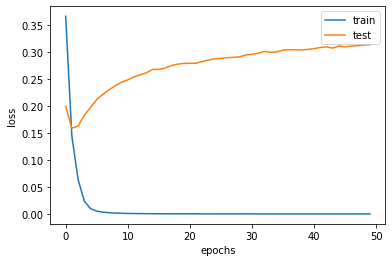

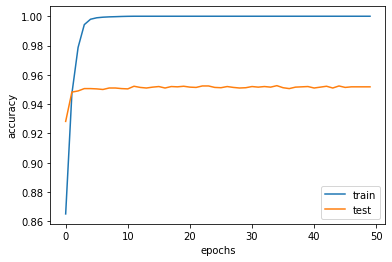

In [17]:
from matplotlib import pyplot

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.ylabel('loss')
pyplot.xlabel('epochs')
pyplot.show()


pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.ylabel('accuracy')
pyplot.xlabel('epochs')
pyplot.show()